# <center> <u> Modern Portfolio Theory </u> </center> 

In [1]:
import numpy as np 
import pandas as pd 

from numba import jit 

import seaborn as sns
import matplotlib.pyplot as plt 

## <center> Mathematical Structure </center> 

## <center> $ r_{p} = \sum_{i=1}^{N} w_{i} r_{i} $ </center> 

## <center> $ \sigma_{AB} = \rho_{AB} \sigma_{A} \sigma_{B} $ </center>

## <center> $ \sigma_{p}^{2} = \sum_{i=1}^{N} w_{i}^{2} \sigma_{i}^{2} + 2 \sum_{i=1}^{N} \sum_{j \neq i}^{} w_{i} w_{j} \sigma_{ij} $ </center>

## <center> $ \sigma_{p} = \sqrt{\sum_{i=1}^{N} w_{i}^{2} \sigma_{i}^{2}} + \sqrt{2 \sum_{i=1}^{N} \sum_{j \neq i}^{} w_{i} w_{j} \sigma_{ij}} $ </center>

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "pastel",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Optimal Weights Portfolio </center> 

## <center> $ \mu = \begin{pmatrix} 0.0427 \\ 0.0015 \\ 0.0285 \end{pmatrix} $ </center> 

## <center> $ \Sigma =  \begin{pmatrix} 0.0100 & 0.0018 & 0.0011 \\ 0.0018 & 0.0109 & 0.0026 \\ 0.0011 & 0.0026 & 0.0199 \end{pmatrix} $ </center> 

In [3]:
tickers = ["MSFT", "NORD", "SBUX"]

In [4]:
mu = np.array([0.0427, 0.0015, 0.0285])

In [5]:
sigma = np.array([
    [0.0100, 0.0018, 0.0011],
    [0.0018, 0.0109, 0.0026],
    [0.0011, 0.0026, 0.0199]
])

d = np.diag(sigma)

In [6]:
mc_portfolio_variance = []
mc_portfolio_mean = []

for i in range(1000):
    rv = np.random.uniform(-1, 1, 2)
    
    weights = np.zeros(3)
    weights[0] = rv[0]
    weights[1] = rv[1]
    weights[2] = 1 - rv[0] - rv[1]
    
    variance = np.dot(np.dot(weights, sigma), weights)
    if variance < np.max(d):
        mc_portfolio_mean.append(np.dot(weights, mu))
        mc_portfolio_variance.append(variance)

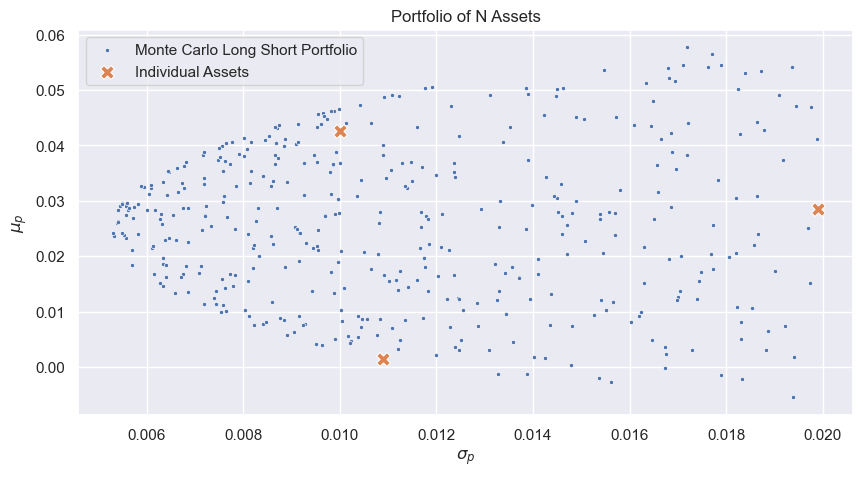

In [7]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

In [8]:
mc_portfolio_variance_long = []
mc_portfolio_mean_long = []

for i in range(100):
    rv = np.random.uniform(0, 1, 3)
    weights = rv / np.sum(rv)
    
    mc_portfolio_mean_long.append(np.dot(weights, mu))
    mc_portfolio_variance_long.append(np.dot(np.dot(weights, sigma), weights))

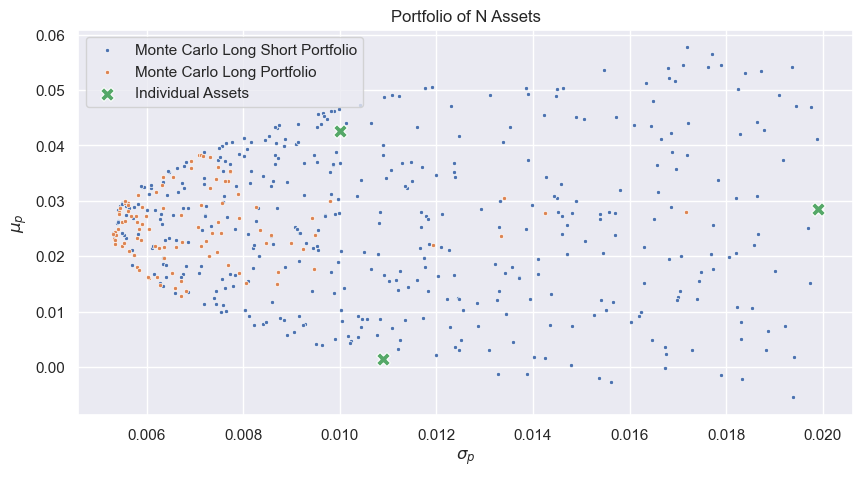

In [9]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = mc_portfolio_variance_long,
    y = mc_portfolio_mean_long,
    label = "Monte Carlo Long Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

## <center> Optimization Routine </center> 

## <center> $ \min \sigma^{2} = w' \Sigma w $ </center> 
    
## <center> $ ||m|| = 1 $ </center> 

## <center> $ L(w, \lambda) = w' \Sigma w + \lambda(w' - 1) $ </center> 

## <center> Gradient </center> 

## <center> $ \frac{\partial L}{\partial w} = 2 \Sigma w + \lambda $ </center>

## <center> $ \frac{\partial L}{\partial \lambda} = w' - 1$ </center>

## <center> System of Equations </center> 

## <center> $ Az = b $ </center>

## <center> $ \begin{pmatrix} 2 \Sigma & 1\\ 1 & 0 \end{pmatrix} \begin{pmatrix} w \\ \lambda \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ </center>

## <center> $ z = A^{-1} b $ </center>

In [10]:
top = np.append(2 * sigma, np.ones((3, 1)), axis = 1)

display(top)

array([[0.02  , 0.0036, 0.0022, 1.    ],
       [0.0036, 0.0218, 0.0052, 1.    ],
       [0.0022, 0.0052, 0.0398, 1.    ]])

In [11]:
bottom = np.append(np.ones((1, 3)), np.zeros((1, 1)), axis = 1)

display(bottom)

array([[1., 1., 1., 0.]])

In [12]:
A = np.append(top, bottom, axis = 0)

display(A)

array([[0.02  , 0.0036, 0.0022, 1.    ],
       [0.0036, 0.0218, 0.0052, 1.    ],
       [0.0022, 0.0052, 0.0398, 1.    ],
       [1.    , 1.    , 1.    , 0.    ]])

In [13]:
b = np.array([
    [0],
    [0],
    [0],
    [1]
])

display(b)

array([[0],
       [0],
       [0],
       [1]])

In [14]:
optimal_weights = np.dot(np.linalg.inv(A), b)

display(optimal_weights)

array([[ 0.44110926],
       [ 0.3656263 ],
       [ 0.19326444],
       [-0.01056362]])

In [15]:
global_min_variance = np.dot(np.dot(optimal_weights[0:3].T, sigma), optimal_weights[0:3])[0]
global_min_return = np.dot(optimal_weights[0:3].T, mu)

In [16]:
global_min_variance

array([0.00528181])

In [17]:
global_min_return

array([0.02489184])

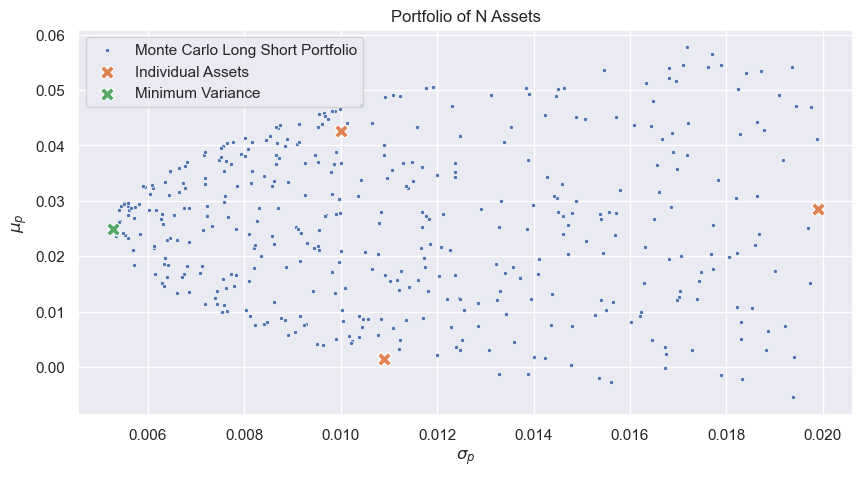

In [18]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = global_min_variance,
    y = global_min_return,
    label = "Minimum Variance",
    marker = "X",
    s = 100
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

## <center> Efficient Frontier </center> 

## <center> $ L(x, \lambda_{1}, \lambda_{2}) = x' \Sigma x + \lambda_{1} \cdot (x' \mu - \mu_{p, 0}) + \lambda_{2} \cdot (x' - 1) $ </center>

## <center> $ \frac{L(x, \lambda_{1}, \lambda_{2})}{\partial x} = 2 \Sigma x + \lambda_{1} \mu + \lambda_{2} = 0 $ </center>

## <center> $ \frac{L(x, \lambda_{1}, \lambda_{2})}{\partial \lambda_{1}} = x' \mu - mu_{p, 0} = 0 $ </center>

## <center> $ \frac{L(x, \lambda_{1}, \lambda_{2})}{\partial \lambda_{2}} = x - 1 = 0 $ </center>

## <center> $ \begin{pmatrix} 2 \Sigma & \mu & 1\\ \mu' & 0 & 0 \\ 1 & 0 & 0 \end{pmatrix} \begin{pmatrix} x \\ \lambda_{1} \\ \lambda_{2} \end{pmatrix} = \begin{pmatrix} 0 \\ \mu_{p, 0} \\ 1 \end{pmatrix} $ </center>

## <center> $ z = A^{-1} b $ </center>

In [19]:
mu_p = np.ones((1, 1)) * mu[0]

In [20]:
ones = np.ones((3, 1))

In [21]:
new_mu = np.ones((3, 1))
new_mu[0, 0] = mu[0]
new_mu[1, 0] = mu[1]
new_mu[2, 0] = mu[2]

In [22]:
2 * sigma

array([[0.02  , 0.0036, 0.0022],
       [0.0036, 0.0218, 0.0052],
       [0.0022, 0.0052, 0.0398]])

In [23]:
top = np.append(2 * sigma, np.append(new_mu, ones, axis = 1), axis = 1)

display(top)

array([[0.02  , 0.0036, 0.0022, 0.0427, 1.    ],
       [0.0036, 0.0218, 0.0052, 0.0015, 1.    ],
       [0.0022, 0.0052, 0.0398, 0.0285, 1.    ]])

In [24]:
mid = np.append(new_mu.T, np.zeros((1, 2)), axis = 1)

display(mid)

array([[0.0427, 0.0015, 0.0285, 0.    , 0.    ]])

In [25]:
bottom = np.append(ones.T, np.zeros((1, 2)), axis = 1)

display(bottom)

array([[1., 1., 1., 0., 0.]])

In [26]:
A = np.append(top, np.append(mid, bottom, axis = 0), axis = 0)

display(A)

array([[0.02  , 0.0036, 0.0022, 0.0427, 1.    ],
       [0.0036, 0.0218, 0.0052, 0.0015, 1.    ],
       [0.0022, 0.0052, 0.0398, 0.0285, 1.    ],
       [0.0427, 0.0015, 0.0285, 0.    , 0.    ],
       [1.    , 1.    , 1.    , 0.    , 0.    ]])

In [27]:
b = np.append(np.zeros((3, 1)), np.append(mu_p.T, np.ones((1, 1)), axis = 0), axis = 0)

display(b)

array([[0.    ],
       [0.    ],
       [0.    ],
       [0.0427],
       [1.    ]])

In [28]:
z = np.dot(np.linalg.inv(A), b)

display(z)

array([[ 0.82745456],
       [-0.09074612],
       [ 0.26329157],
       [-0.35029028],
       [-0.00184425]])

In [29]:
e1_variance = np.dot(np.dot(z[0:3].T, sigma), z[0:3])[0]
e1_return = np.dot(z[0:3].T, mu)

In [30]:
e1_variance

array([0.00840082])

In [31]:
e1_return

array([0.0427])

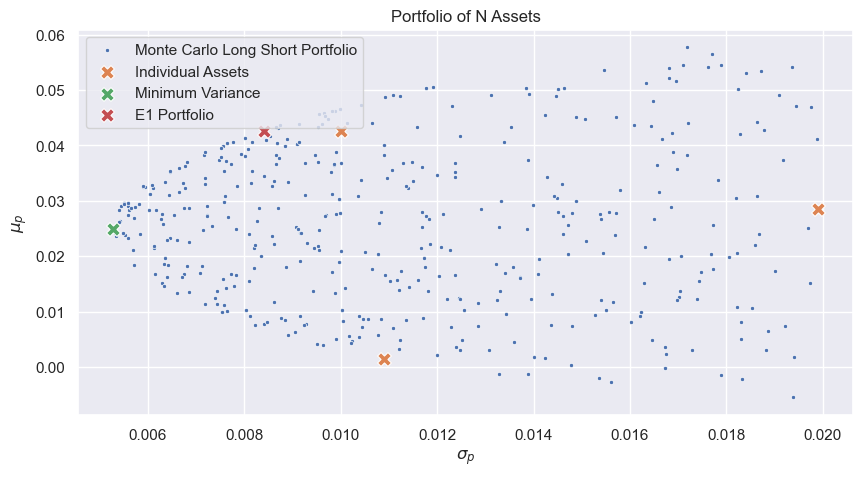

In [32]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = global_min_variance,
    y = global_min_return,
    label = "Minimum Variance",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = e1_variance,
    y = e1_return,
    label = "E1 Portfolio",
    marker = "X",
    s = 100
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

In [33]:
alpha = np.linspace(global_min_return, np.max(mc_portfolio_mean), 100)

In [34]:
frontier_return = np.zeros(100)
frontier_variance = np.zeros(100)

for i, a in enumerate(alpha):
    b = np.append(np.zeros((3, 1)), np.append(np.array([a]), np.ones((1, 1)), axis = 0), axis = 0)
    z = np.dot(np.linalg.inv(A), b)
    e_variance = np.dot(np.dot(z[0:3].T, sigma), z[0:3])[0]
    e_return = np.dot(z[0:3].T, mu)
    
    frontier_return[i] = e_return
    frontier_variance[i] = e_variance

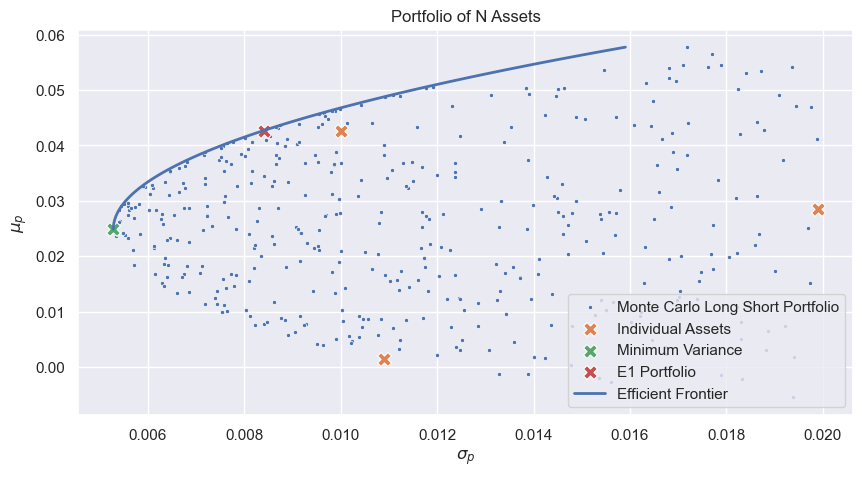

In [35]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = global_min_variance,
    y = global_min_return,
    label = "Minimum Variance",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = e1_variance,
    y = e1_return,
    label = "E1 Portfolio",
    marker = "X",
    s = 100
)

sns.lineplot(
    x = frontier_variance,
    y = frontier_return,
    label = "Efficient Frontier",
    linewidth = 2
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

## <center> Maximum Sharpe Optimization Procedure </center> 

## <center> $ \max_{t} \frac{t' \mu - r_{f}}{(t' \Sigma t)^{\frac{1}{2}}} = \frac{\mu_{p, t} r_{f}}{\sigma_{p, t}} $ </center> 

## <center> $ || t || = 1$ </center>

## <center> $ L(t, \lambda) = (t' \mu - r_{f}) (t' \Sigma t)^{\frac{-1}{2}} + \lambda (t' - 1) $ </center>

## <center> Gradient </center> 

## <center> $ \frac{\partial L}{\partial t} = \mu (t' \Sigma t)^{\frac{-1}{2}} - (t' \mu - r_{f}) (t' \Sigma t)^{\frac{-3}{2}} \Sigma t + \lambda = 0 $ </center>

## <center> $ \frac{\partial L}{\partial \lambda} = t' - 1 = 0 $ </center>

## <center> $ t = \frac{\Sigma^{-1} (\mu - r_{f})}{\Sigma{-1} (\mu - r_{f})} $ </center>

In [36]:
r_f = 0.005

In [37]:
top = np.dot(np.linalg.inv(sigma), mu - r_f)

display(top)

array([ 3.86712065, -1.2286952 ,  1.12767713])

In [38]:
bottom = np.dot(np.ones(3).T, np.dot(np.linalg.inv(sigma), mu - r_f))

display(bottom)

3.766102576481061

In [39]:
max_sharpe_weights = top / bottom

In [40]:
max_sharpe_return = np.dot(mu, max_sharpe_weights)

In [41]:
max_sharpe_return

0.05188966661993493

In [42]:
max_sharpe_variance = np.dot(np.dot(max_sharpe_weights.T, sigma), max_sharpe_weights)

In [43]:
max_sharpe_variance

0.012450448618355817

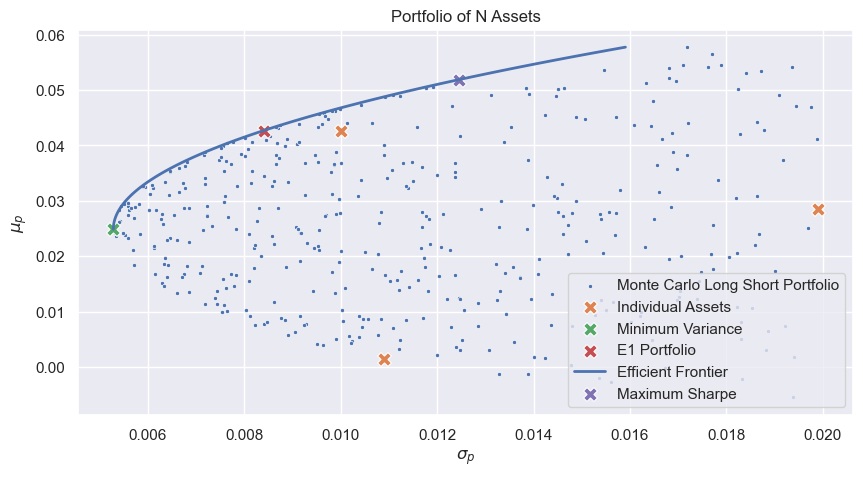

In [44]:
ax = sns.scatterplot(
    x = mc_portfolio_variance,
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = d,
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = global_min_variance,
    y = global_min_return,
    label = "Minimum Variance",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = e1_variance,
    y = e1_return,
    label = "E1 Portfolio",
    marker = "X",
    s = 100
)

sns.lineplot(
    x = frontier_variance,
    y = frontier_return,
    label = "Efficient Frontier",
    linewidth = 2
)

sns.scatterplot(
    x = [max_sharpe_variance],
    y = [max_sharpe_return],
    label = "Maximum Sharpe",
    marker = "X",
    s = 100
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

## <center> Capital Allocation Line </center> 

## <center> $ \mu_{c} = r_{f} + SR_{t} \cdot \sigma_{c} $ </center>

In [45]:
sigma_c = np.linspace(0, np.sqrt(np.max(d)), 100)

In [46]:
sharpe_P = (max_sharpe_return - r_f) / np.sqrt(max_sharpe_variance)
sharpe_P

0.4202276695645767

In [47]:
P = r_f + sharpe_P * sigma_c

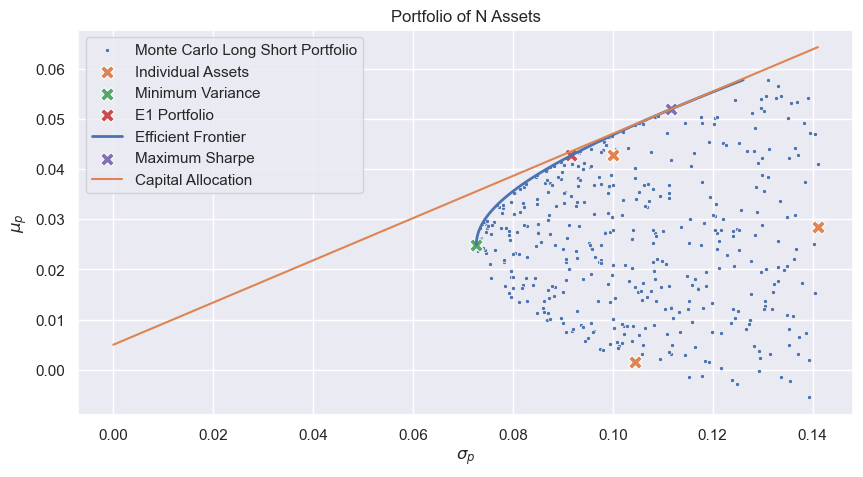

In [48]:
ax = sns.scatterplot(
    x = np.sqrt(mc_portfolio_variance),
    y = mc_portfolio_mean,
    label = "Monte Carlo Long Short Portfolio",
    marker = "."
)

sns.scatterplot(
    x = np.sqrt(d),
    y = mu,
    label = "Individual Assets",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = np.sqrt(global_min_variance),
    y = global_min_return,
    label = "Minimum Variance",
    marker = "X",
    s = 100
)

sns.scatterplot(
    x = np.sqrt(e1_variance),
    y = e1_return,
    label = "E1 Portfolio",
    marker = "X",
    s = 100
)

sns.lineplot(
    x = np.sqrt(frontier_variance),
    y = frontier_return,
    label = "Efficient Frontier",
    linewidth = 2
)

sns.scatterplot(
    x = [np.sqrt(max_sharpe_variance)],
    y = [max_sharpe_return],
    label = "Maximum Sharpe",
    marker = "X",
    s = 100
)

sns.lineplot(
    x = sigma_c,
    y = P,
    label = "Capital Allocation"
)

ax.set(
    title = "Portfolio of N Assets",
    xlabel = "$ \sigma_{p} $",
    ylabel = "$ \mu_{p} $"
)

plt.show()

## <center> Quadratic Programming </center> 

## <center> $ \min \frac{1}{2} w' D w - d' w $ </center>

## <center> $ A'_{eq} w \gt b_{eq} $ </center>

## <center> $ A'_{neg} w = b_{neg} $ </center>

## <center> Short Sale Constraints </center> 

## <center> $ \frac{1}{2} w' D w - d' w = w' \Sigma w = \sigma_{p, m}^{2} $ </center>